###Importando o dataset e tratando os dados e traduzindo eles

In [4]:
#Importando Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [5]:
#Importando CSVs
test = pd.read_csv("./test.csv")
train = pd.read_csv("./train.csv")

In [6]:
#Concatenando CSVs
df_casas = pd.concat([train, test])

In [7]:
#Identificando caracteristicas do Dataset

df_casas.info()
df_casas.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [8]:
#Removendo Colunas
colunas_a_remover = ['Alley', 'Utilities', 'LandContour', 'LandSlope', 'Condition1',
                     'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                     'MasVnrType', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
                     'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath',
                     'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
                     'LowQualFinSF', 'FullBath', 'HalfBath', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageType',
                     'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                     'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition', 'MoSold', 'LotShape', 'KitchenQual']
df_casas_limpa = df_casas.drop(colunas_a_remover, axis=1)

In [9]:
#Renomeando Colunas
df_casas_traduzido = df_casas_limpa.rename(columns={
  'Id' : 'ID',
  'MSSubClass' : 'TipoConstrução',
  'MSZoning' : 'Zoneamento',
  'LotFrontage' : 'FrenteLote',
  'LotArea' : 'AreaLote',
  'Street' : 'Rua',
  'LotConfig' : 'ConfigLote',
  'Neighborhood' : 'Vizinhanca',
  'BldgType' : 'TipoImovel',
  'HouseStyle' : 'EstiloCasa',
  'OverallQual' : 'QualidadeGeral',
  'OverallCond' : 'CondicaoGeral',
  'YearBuilt' : 'AnoConstrucao',
  'YearRemodAdd' : 'AnoReforma',
  'ExterQual' : 'QualidadeExterior',
  'ExterCond' : 'CondicaoExterior',
  'Foundation' : 'Fundacao',
  'BsmtQual' : 'QualidadeSuíte',
  'Foundation' : 'Fundacao',
  'BsmtQual' : 'QualiPorao',
  'BsmtCond' : 'CondiPorao',
  'TotalBsmtSF' : 'AreaTotalPorao',
  'GrLivArea': 'AreaHabitavel',
  'BedroomAbvGr' : 'NumeroQuarto',
  'KitchenAbvGr' : 'NumeroCozinha',
  'TotRmsAbvGrd' : 'TotalComodos',
  'GarageCars' : 'NumeroVagas',
  'GarageArea' : 'AreaVagas',
  'YrSold' : 'AnoVenda',
  'SalePrice' : 'PrecoVenda',
  'TotalBsmtSF' : 'AreaTotalPorao',

})

In [10]:
df_casas_traduzido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2919 non-null   int64  
 1   TipoConstrução     2919 non-null   int64  
 2   Zoneamento         2915 non-null   object 
 3   FrenteLote         2433 non-null   float64
 4   AreaLote           2919 non-null   int64  
 5   Rua                2919 non-null   object 
 6   ConfigLote         2919 non-null   object 
 7   Vizinhanca         2919 non-null   object 
 8   TipoImovel         2919 non-null   object 
 9   EstiloCasa         2919 non-null   object 
 10  QualidadeGeral     2919 non-null   int64  
 11  CondicaoGeral      2919 non-null   int64  
 12  AnoConstrucao      2919 non-null   int64  
 13  AnoReforma         2919 non-null   int64  
 14  QualidadeExterior  2919 non-null   object 
 15  CondicaoExterior   2919 non-null   object 
 16  Fundacao           2919 non-n

In [11]:
#Renomeando os Registros da Colunas Rua
mapa_substituicao = {
    'Pave' : 'Pavimentada',
    'Grvl' : 'Terra'
}

df_casas_traduzido['Rua'] = df_casas_traduzido['Rua'].replace(mapa_substituicao)
df_casas_traduzido['Rua'].value_counts()

,count
Rua,
Pavimentada,2907
Terra,12


In [12]:
#Renomeando zoneamento
mapa_substituicao = {
    'RL' : 'Residencial_Baixa',
    'RM' : 'Residencial_Media',
    'FV' : 'Residencial_Alta_Vila',
    'RH' : 'Residencial_Alta_Apartamento',
    'C (all)' : 'Comercial',
    'I (ind)' : 'Industrial',
    'A (agr)' : 'Agricola'

}
df_casas_traduzido['Zoneamento'] = df_casas_traduzido['Zoneamento'].replace(mapa_substituicao)
df_casas_traduzido['Zoneamento'].value_counts()

,count
Zoneamento,
Residencial_Baixa,2265
Residencial_Media,460
Residencial_Alta_Vila,139
Residencial_Alta_Apartamento,26
Comercial,25


In [13]:
#Renomeando ConfigLote
mapa_substituicao = {
    'Inside' : 'Interno',
    'Corner' : 'Esquina',
    'CulDSac' : 'Fim de Rua',
    'FR2' : 'Frente Dupla',
    'FR3' : 'Frente Tripla'
}

df_casas_traduzido['ConfigLote'] = df_casas_traduzido['ConfigLote'].replace(mapa_substituicao)
df_casas_traduzido['ConfigLote'].value_counts()

,count
ConfigLote,
Interno,2133
Esquina,511
Fim de Rua,176
Frente Dupla,85
Frente Tripla,14


In [14]:
#Renomeando TipoImovel

mapa_substituicao = {
    '1Fam' : 'Casa Unifamiliar',
    'TwnhsE' : 'Casa Geminada - final fileira',
    'Duplex' : 'Duplex',
    'Twnhs' : 'Casa Geminada - meio de fileira',
    '2fmCon' : 'Conversao duas familias',

}

df_casas_traduzido['TipoImovel'] = df_casas_traduzido['TipoImovel'].replace(mapa_substituicao)
df_casas_traduzido['TipoImovel'].value_counts()

,count
TipoImovel,
Casa Unifamiliar,2425
Casa Geminada - final fileira,227
Duplex,109
Casa Geminada - meio de fileira,96
Conversao duas familias,62


In [15]:
#Renomeando EstiloCasa
mapa_substituicao_estilocasa = {
    '1Story' : 'Um Andar',
    '2Story' : 'Dois Andar',
    '1.5Fin' : 'Um e Meio Andar Finalizado',
    '1.5Unf' : 'Um e Meio Andar Inacabado',
    'SLvl' : 'Nivel Dividido',
    'SFoyer' : 'Foyer Dividido',
    '2.5Unf' : 'Dois e Meio Andar Inacabado',
    '2.5Fin' : 'Dois e Meio Andar Finalizado'
}


df_casas_traduzido['EstiloCasa'] = df_casas_traduzido['EstiloCasa'].replace(mapa_substituicao_estilocasa)
df_casas_traduzido['EstiloCasa'].value_counts()

,count
EstiloCasa,
Um Andar,1471
Dois Andar,872
Um e Meio Andar Finalizado,314
Nivel Dividido,128
Foyer Dividido,83
Dois e Meio Andar Inacabado,24
Um e Meio Andar Inacabado,19
Dois e Meio Andar Finalizado,8


In [16]:
#Renomeando QualidadeExterior

mapa_substituicao_qualidade_exterior = {
    'Ex': 'Excelente',
    'Gd': 'Boa',
    'TA': 'Media',
    'Fa': 'Razoavel',
    'Po': 'Pobre'
}
df_casas_traduzido['QualidadeExterior'] = df_casas_traduzido['QualidadeExterior'].replace(mapa_substituicao_qualidade_exterior)
df_casas_traduzido['QualidadeExterior'].value_counts()

,count
QualidadeExterior,
Media,1798
Boa,979
Excelente,107
Razoavel,35


In [17]:
#Renomeando CondicaoExterior
mapa_substituicao_condicao_exterior = {
    'Ex': 'Excelente',
    'Gd': 'Boa',
    'TA': 'Media',
    'Fa': 'Razoavel',
    'Po': 'Pobre'
}

df_casas_traduzido['CondicaoExterior'] = df_casas_traduzido['CondicaoExterior'].replace(mapa_substituicao_condicao_exterior)
df_casas_traduzido['CondicaoExterior'].value_counts()

,count
CondicaoExterior,
Media,2538
Boa,299
Razoavel,67
Excelente,12
Pobre,3


In [18]:
#Renomeando Fundacao
mapa_substituicao_fundacao = {
    'PConc': 'Concreto Vazado',
    'CBlock': 'Blocos de Concreto',
    'BrkTil': 'Tijolos e Pedra',
    'Slab': 'Laje',
    'Stone': 'Pedra',
    'Wood': 'Madeira'
}

df_casas_traduzido['Fundacao'] = df_casas_traduzido['Fundacao'].replace(mapa_substituicao_fundacao)
df_casas_traduzido['Fundacao'].value_counts()

,count
Fundacao,
Concreto Vazado,1308
Blocos de Concreto,1235
Tijolos e Pedra,311
Laje,49
Pedra,11
Madeira,5


In [19]:
#Renomeando QualiPorao
mapa_substituicao_qualiporao = {
    'Ex': 'Excelente',
    'Gd': 'Boa',
    'TA': 'Media',
    'Fa': 'Razoavel',
    'Po': 'Pobre'
}

df_casas_traduzido['QualiPorao'] = df_casas_traduzido['QualiPorao'].replace(mapa_substituicao_qualiporao)
df_casas_traduzido['QualiPorao'].value_counts()

,count
QualiPorao,
Media,1283
Boa,1209
Excelente,258
Razoavel,88


In [20]:
#Renomeando CondiPorao
mapa_substituicao_condiporao = {
    'Ex': 'Excelente',
    'Gd': 'Boa',
    'TA': 'Media',
    'Fa': 'Razoavel',
    'Po': 'Pobre'
}

df_casas_traduzido['CondiPorao'] = df_casas_traduzido['CondiPorao'].replace(mapa_substituicao_condiporao)
df_casas_traduzido['CondiPorao'].value_counts()

,count
CondiPorao,
Media,2606
Boa,122
Razoavel,104
Pobre,5


In [21]:
#DataFrame Final
df_casas_traduzido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2919 non-null   int64  
 1   TipoConstrução     2919 non-null   int64  
 2   Zoneamento         2915 non-null   object 
 3   FrenteLote         2433 non-null   float64
 4   AreaLote           2919 non-null   int64  
 5   Rua                2919 non-null   object 
 6   ConfigLote         2919 non-null   object 
 7   Vizinhanca         2919 non-null   object 
 8   TipoImovel         2919 non-null   object 
 9   EstiloCasa         2919 non-null   object 
 10  QualidadeGeral     2919 non-null   int64  
 11  CondicaoGeral      2919 non-null   int64  
 12  AnoConstrucao      2919 non-null   int64  
 13  AnoReforma         2919 non-null   int64  
 14  QualidadeExterior  2919 non-null   object 
 15  CondicaoExterior   2919 non-null   object 
 16  Fundacao           2919 non-n

In [22]:
#Removendo valores vazios e duplicatas
df_casas_com_preco = df_casas_traduzido.dropna(subset=['PrecoVenda'])
df_casas_com_preco = df_casas_com_preco.drop_duplicates()
df_casas_com_preco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1460 non-null   int64  
 1   TipoConstrução     1460 non-null   int64  
 2   Zoneamento         1460 non-null   object 
 3   FrenteLote         1201 non-null   float64
 4   AreaLote           1460 non-null   int64  
 5   Rua                1460 non-null   object 
 6   ConfigLote         1460 non-null   object 
 7   Vizinhanca         1460 non-null   object 
 8   TipoImovel         1460 non-null   object 
 9   EstiloCasa         1460 non-null   object 
 10  QualidadeGeral     1460 non-null   int64  
 11  CondicaoGeral      1460 non-null   int64  
 12  AnoConstrucao      1460 non-null   int64  
 13  AnoReforma         1460 non-null   int64  
 14  QualidadeExterior  1460 non-null   object 
 15  CondicaoExterior   1460 non-null   object 
 16  Fundacao           1460 non-n

In [23]:
#Identificando caracteristicas importantes
df_casas_com_preco.describe()

,ID,TipoConstrução,FrenteLote,AreaLote,QualidadeGeral,CondicaoGeral,AnoConstrucao,AnoReforma,AreaTotalPorao,AreaHabitavel,NumeroQuarto,NumeroCozinha,TotalComodos,NumeroVagas,AreaVagas,AnoVenda,PrecoVenda
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,1057.429452,1515.463699,2.866438,1.046575,6.517808,1.767123,472.980137,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,438.705324,525.480383,0.815778,0.220338,1.625393,0.747315,213.804841,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,795.750000,1129.500000,2.000000,1.000000,5.000000,1.000000,334.500000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,991.500000,1464.000000,3.000000,1.000000,6.000000,2.000000,480.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,1298.250000,1776.750000,3.000000,1.000000,7.000000,2.000000,576.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,6110.000000,5642.000000,8.000000,3.000000,14.000000,4.000000,1418.000000,2010.000000,755000.000000


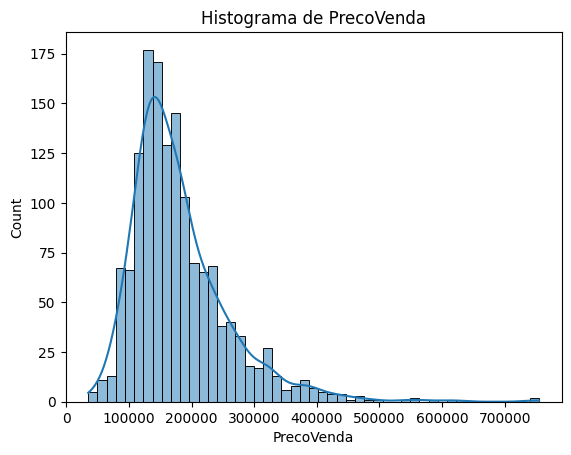

In [24]:
#Histograma de PrecoVenda
sns.histplot(data = df_casas_com_preco, x= 'PrecoVenda', kde= True)
plt.title('Histograma de PrecoVenda')
plt.show()

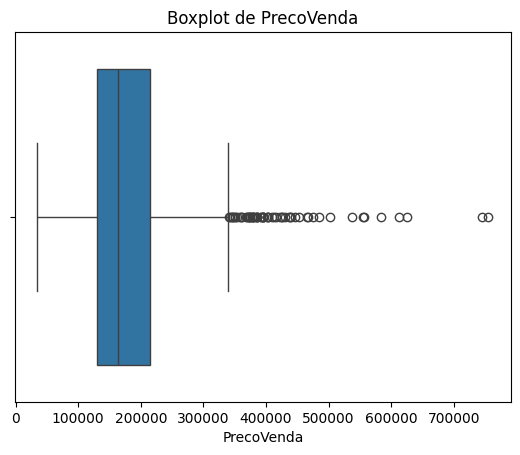

In [25]:
#Análise dos preços e outliers
sns.boxplot(x=df_casas_com_preco['PrecoVenda'])
plt.title('Boxplot de PrecoVenda')
plt.show()

In [26]:
#Identificando a distribuição
print(f"Assimetria: {df_casas_com_preco['PrecoVenda'].skew()}")
print(f"Curtose: {df_casas_com_preco['PrecoVenda'].kurtosis()}")
#Cauda pesada com Assimetria a Diteita

Assimetria: 1.8828757597682129
Curtose: 6.536281860064529


In [27]:
#Removendo Quartil atravez do IQR (Intervalo Interquartil)

Q1 = df_casas_com_preco['PrecoVenda'].quantile(0.25)
Q3 = df_casas_com_preco['PrecoVenda'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_casas_final = df_casas_com_preco[(df_casas_com_preco['PrecoVenda'] >= limite_inferior) & (df_casas_com_preco['PrecoVenda'] <= limite_superior)]


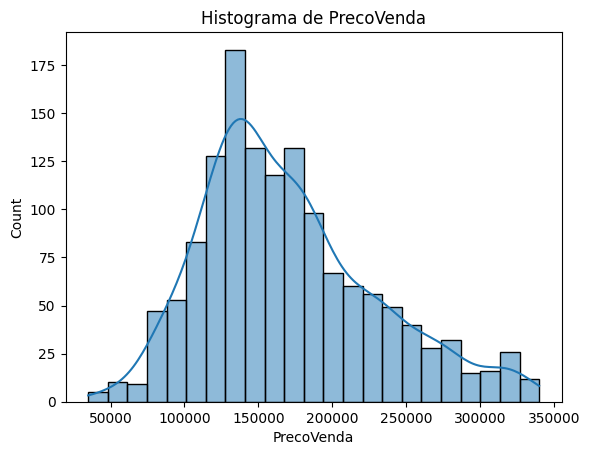

In [28]:
#Verificando Histograma de PrecoVenda apos remoção
sns.histplot(data = df_casas_final, x= 'PrecoVenda', kde= True)
plt.title('Histograma de PrecoVenda')
plt.show()

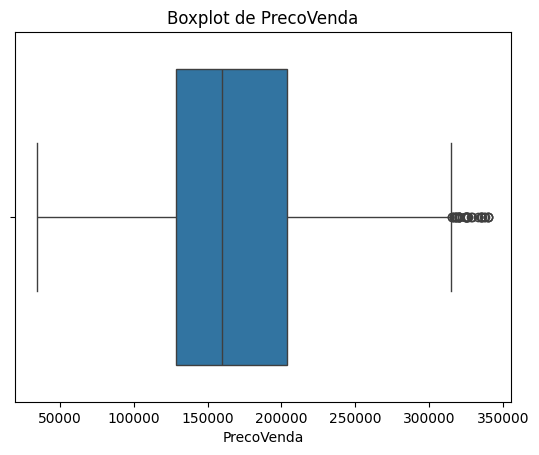

In [29]:
#Análise dos preços e outliers depois da remoção da outliers
sns.boxplot(x=df_casas_final['PrecoVenda'])
plt.title('Boxplot de PrecoVenda')
plt.show()

In [30]:
#Identificando a distribuição
print(f"Assimetria: {df_casas_final['PrecoVenda'].skew()}")
print(f"Curtose: {df_casas_final['PrecoVenda'].kurtosis()}")
#Cauda pesada com Assimetria a Diteita

Assimetria: 0.6797386630838265
Curtose: 0.09092713602572067


In [31]:
df_casas_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1399 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1399 non-null   int64  
 1   TipoConstrução     1399 non-null   int64  
 2   Zoneamento         1399 non-null   object 
 3   FrenteLote         1143 non-null   float64
 4   AreaLote           1399 non-null   int64  
 5   Rua                1399 non-null   object 
 6   ConfigLote         1399 non-null   object 
 7   Vizinhanca         1399 non-null   object 
 8   TipoImovel         1399 non-null   object 
 9   EstiloCasa         1399 non-null   object 
 10  QualidadeGeral     1399 non-null   int64  
 11  CondicaoGeral      1399 non-null   int64  
 12  AnoConstrucao      1399 non-null   int64  
 13  AnoReforma         1399 non-null   int64  
 14  QualidadeExterior  1399 non-null   object 
 15  CondicaoExterior   1399 non-null   object 
 16  Fundacao           1399 non-n

In [32]:
df_casas_final.isnull().sum()

,0
ID,0
TipoConstrução,0
Zoneamento,0
FrenteLote,256
AreaLote,0
Rua,0
ConfigLote,0
Vizinhanca,0
TipoImovel,0
EstiloCasa,0


In [33]:
#importando dataset final
df_casas_final.to_csv('casas_final.csv', index=False)

###Graficos e Análises com dados tratados

In [34]:
#Identificando caracteristicas importantes
df_casas_final.describe()

,ID,TipoConstrução,FrenteLote,AreaLote,QualidadeGeral,CondicaoGeral,AnoConstrucao,AnoReforma,AreaTotalPorao,AreaHabitavel,NumeroQuarto,NumeroCozinha,TotalComodos,NumeroVagas,AreaVagas,AnoVenda,PrecoVenda
count,1399.000000,1399.000000,1143.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,733.508935,57.487491,69.058618,10155.280915,5.983560,5.591137,1970.080772,1984.058613,1024.273767,1474.413867,2.862044,1.048606,6.416726,1.717655,458.817012,2007.819871,170237.127234
std,422.811873,42.803603,23.813289,8324.834198,1.282272,1.118236,30.009463,20.661160,407.031806,480.552421,0.806081,0.224874,1.544766,0.721365,204.278673,1.327762,59230.130817
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2006.000000,34900.000000
25%,367.500000,20.000000,59.000000,7442.000000,5.000000,5.000000,1953.000000,1966.000000,788.000000,1119.000000,2.000000,1.000000,5.000000,1.000000,312.000000,2007.000000,129000.000000
50%,739.000000,50.000000,68.000000,9317.000000,6.000000,5.000000,1971.000000,1992.000000,973.000000,1437.000000,3.000000,1.000000,6.000000,2.000000,471.000000,2008.000000,159500.000000
75%,1098.500000,70.000000,80.000000,11316.500000,7.000000,6.000000,1999.000000,2003.000000,1251.500000,1728.000000,3.000000,1.000000,7.000000,2.000000,573.000000,2009.000000,203500.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,6110.000000,5642.000000,8.000000,3.000000,14.000000,4.000000,1418.000000,2010.000000,340000.000000


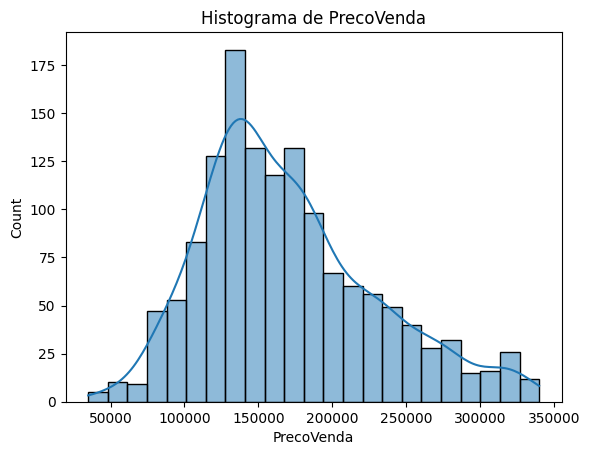

In [35]:
#Grafico de densidade Preço venda
sns.histplot(data = df_casas_final,
             x= 'PrecoVenda',
             kde= True)
plt.title('Histograma de PrecoVenda')
plt.show()

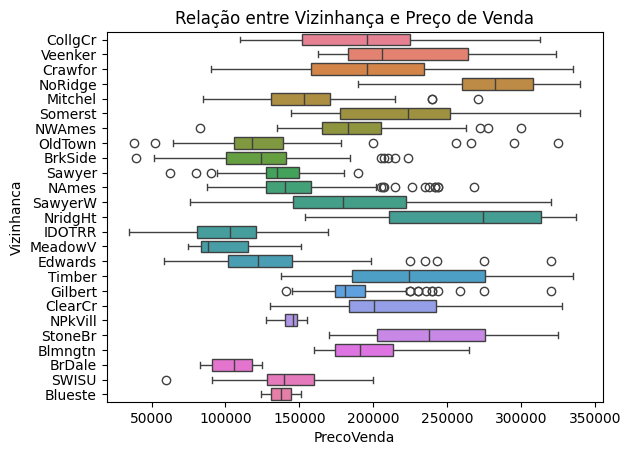

In [36]:
#Relação entre Vizinhança e PrecoVenda
sns.boxplot(
    x='PrecoVenda',
    y='Vizinhanca',
    data=df_casas_final,
    hue='Vizinhanca'
)
plt.title("Relação entre Vizinhança e Preço de Venda")
plt.show()

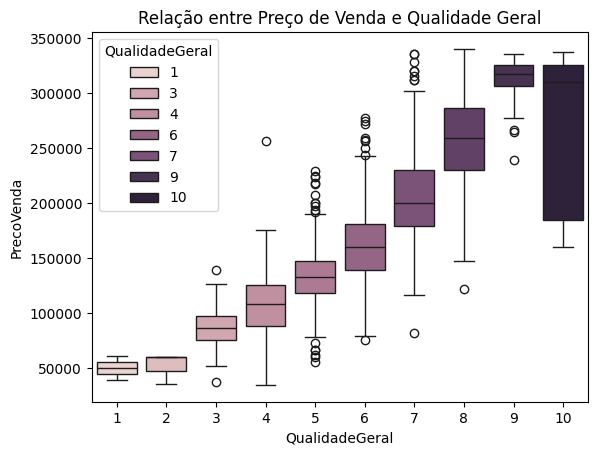

In [37]:
#Relação entre preço de venda e qualidade geral

sns.boxplot(
    x='QualidadeGeral',
    y='PrecoVenda',
    data=df_casas_final,
    hue='QualidadeGeral'
)
plt.title("Relação entre Preço de Venda e Qualidade Geral")
plt.show()

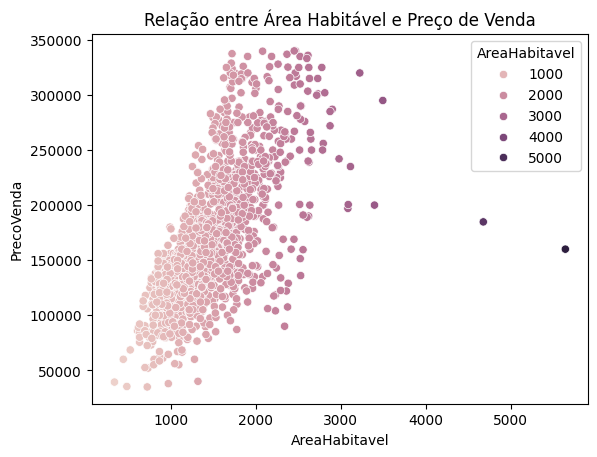

In [38]:
#Gráfico de dispersão Área Habitável e Preço venda
sns.scatterplot(
    x='AreaHabitavel',
    y='PrecoVenda',
    data=df_casas_final,
    hue = 'AreaHabitavel'
)
plt.title("Relação entre Área Habitável e Preço de Venda")
plt.show()

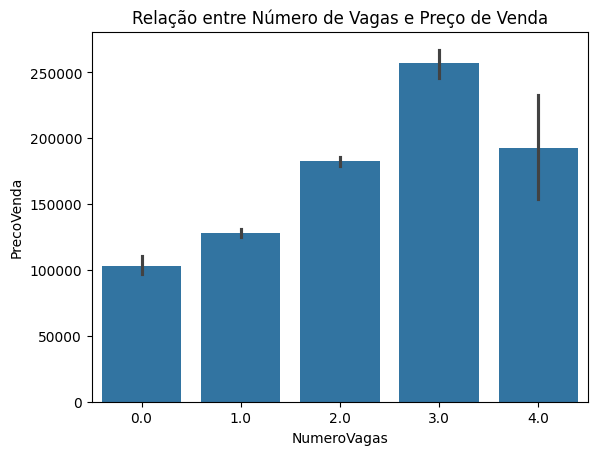

In [39]:
#Grafico em barra Numero de vagas e preço casas
sns.barplot(
    x='NumeroVagas',
    y='PrecoVenda',
    data=df_casas_final,
)
plt.title("Relação entre Número de Vagas e Preço de Venda")
plt.show()


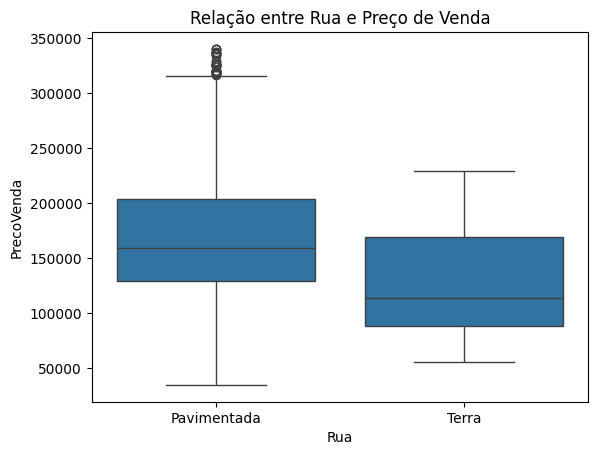

In [40]:
#boxplot Rua preço e preço venda
sns.boxplot(
    x='Rua',
    y='PrecoVenda',
    data=df_casas_final
)
plt.title("Relação entre Rua e Preço de Venda")
plt.show()


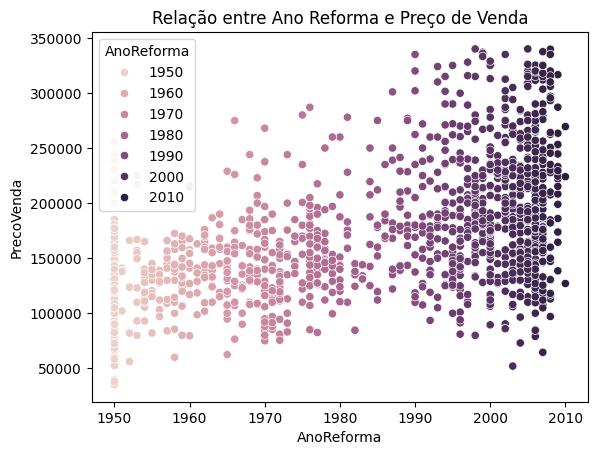

In [41]:
#Disperção de Preço vendas e Ano reforma
sns.scatterplot(
    x='AnoReforma',
    y='PrecoVenda',
    data=df_casas_final,
    hue = 'AnoReforma'
)
plt.title("Relação entre Ano Reforma e Preço de Venda")
plt.show()

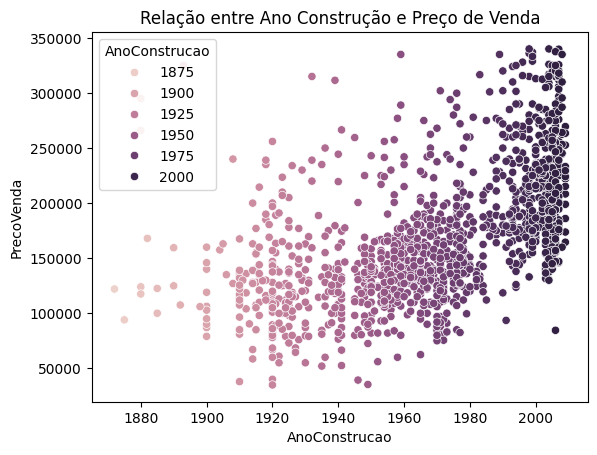

In [42]:
#Grafico Disperção de Ano construção e Preço Venda
sns.scatterplot(
    x='AnoConstrucao',
    y='PrecoVenda',
    data=df_casas_final,
    hue = 'AnoConstrucao'
)
plt.title("Relação entre Ano Construção e Preço de Venda")
plt.show()